In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel('/content/sample_data/iris.xlsx')
data.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking basic details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.shape

(150, 5)

In [6]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


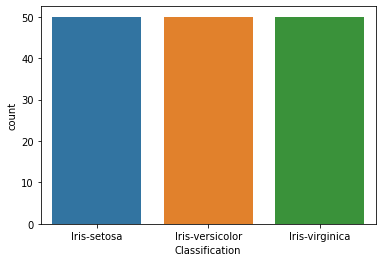

In [7]:
sns.countplot(data['Classification'])

Text(0.5, 1.0, 'Kernal Density estimation Of SL & PL')

<Figure size 432x288 with 0 Axes>

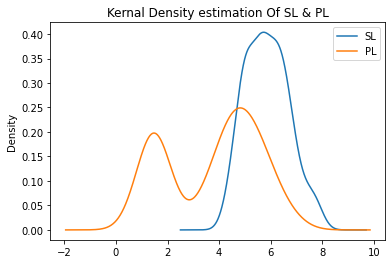

In [8]:
plt.figure()
data[['SL','PL']].plot.kde()
plt.title('Kernal Density estimation Of SL & PL')

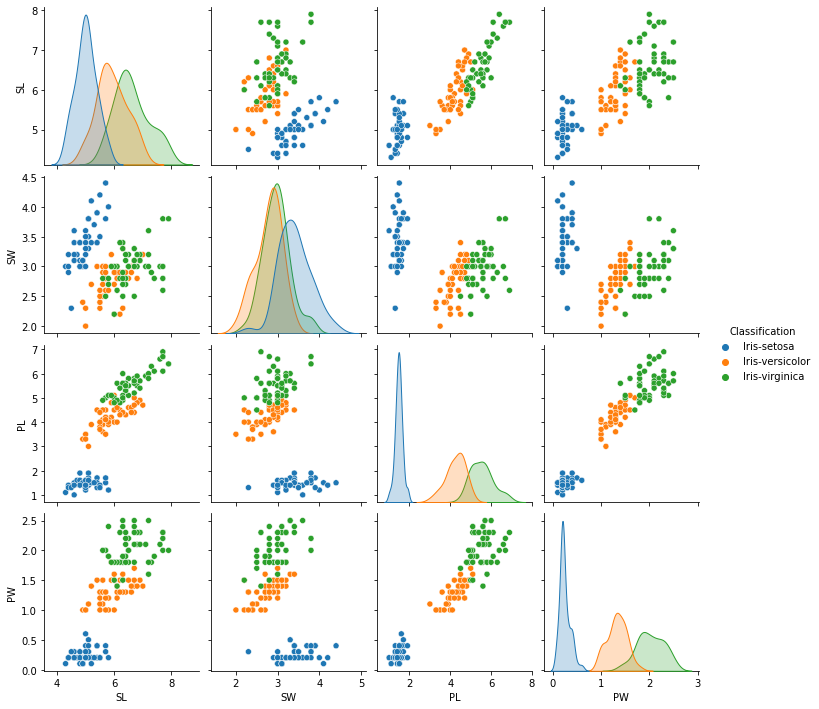

In [9]:
sns.pairplot(data,hue='Classification')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


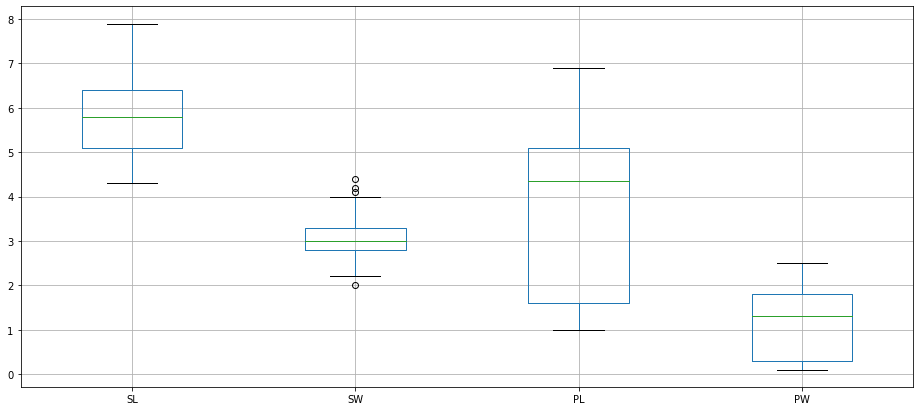

In [10]:
plt.figure(figsize=(16,7))
data.boxplot()

# 2. Do necessary pre-processing steps.

In [11]:
#checking missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [12]:
#filling missing values in the SL & PL column using mean
data['SL']=data['SL'].fillna(data['SL'].mean())
data['PL']=data['PL'].fillna(data['PL'].mean())

In [13]:
#filling missing values in the SW column using median
data['SW']=data['SW'].fillna(data['SW'].median())

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now all the missing values are filled.

In [15]:
#Handling outliers in the 'SW' column
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_lim=',low_lim)
print('up_lim=',up_lim)
outlier=[]
for x in data['SW']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
outlier

Q1= 2.8
Q2= 3.0
Q3= 3.25
low_lim= 2.1249999999999996
up_lim= 3.9250000000000003


[4.0, 4.4, 4.1, 4.2, 2.0]

In [16]:
ind1 =data["SW"]>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [17]:
ind2 =data["SW"]<low_lim
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [18]:
data.drop([14, 15, 32, 33,60],inplace=True)

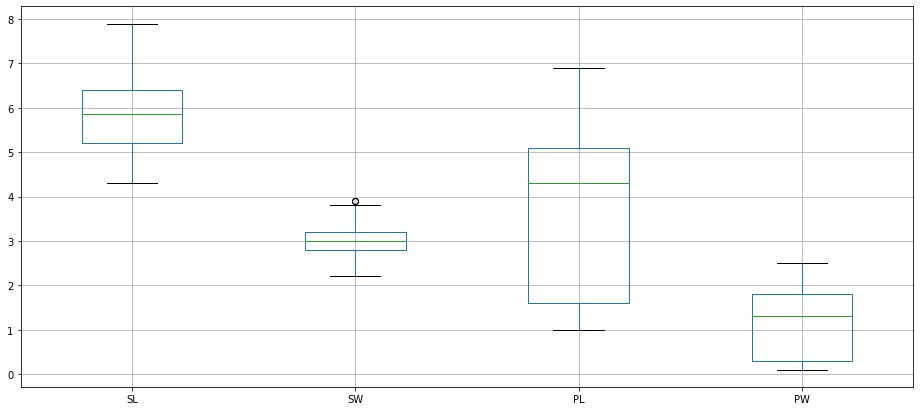

In [19]:
plt.figure(figsize=(16,7))
data.boxplot()

Now all the outliers are cleared.

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [20]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [21]:
#spliting the dataset to target & features
x=data.drop(['Classification'],axis=1)

In [22]:
from sklearn.preprocessing import LabelEncoder
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Classification']= label_encoder.fit_transform(data['Classification'])
data['Classification'].unique()

array([0, 1, 2])

In [24]:
y=data['Classification']

In [25]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [26]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred =logit_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
y_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2])

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy of Logistic regression model is :",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score Score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))
print("confusion matrix ",confusion_matrix(y_test,y_pred))

Accuracy of Logistic regression model is : 0.8918918918918919
Precision Score :  0.8918918918918919
Recall Score :  0.8918918918918919
f1 score Score :  0.8918918918918919
confusion matrix  [[13  1  0]
 [ 0  8  1]
 [ 0  2 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [29]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='manhattan')
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)

In [30]:
acc=accuracy_score(y_test,y_pred)
acc_values.append(acc)

In [31]:
acc_values

[0.8918918918918919]

In [32]:
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [33]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='manhattan')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [34]:
print("Accuracy of knn model is :",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score Score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))
print("confusion matrix ",confusion_matrix(y_test,y_pred))

Accuracy of knn model is : 0.8918918918918919
Precision Score :  0.8918918918918919
Recall Score :  0.8918918918918919
f1 score Score :  0.8918918918918919
confusion matrix  [[13  1  0]
 [ 0  8  1]
 [ 0  2 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [35]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred=dt_model.predict(x_test)

In [37]:
print("Accuracy of Decision tree model is :",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score Score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))

Accuracy of Decision tree model is : 0.918918918918919
Precision Score :  0.918918918918919
Recall Score :  0.918918918918919
f1 score Score :  0.918918918918919


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [38]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]])

In [42]:
##Linear SVM model
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [43]:
y_pred=svm_linear.predict(x_test)

In [44]:
print("Accuracy of svm model is :",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score Score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))

Accuracy of svm model is : 0.918918918918919
Precision Score :  0.918918918918919
Recall Score :  0.918918918918919
f1 score Score :  0.918918918918919


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [46]:
#standarising the feature
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [47]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [48]:
print("Accuracy of svm model is :",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score Score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))

Accuracy of svm model is : 0.972972972972973
Precision Score :  0.972972972972973
Recall Score :  0.972972972972973
f1 score Score :  0.972972972972973


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


By normalising the values,our svm model efficiency increased.

In [49]:
#Radial svm
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)


In [50]:
print("Accuracy of radial svm model is :",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score Score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))

Accuracy of radial svm model is : 0.972972972972973
Precision Score :  0.972972972972973
Recall Score :  0.972972972972973
f1 score Score :  0.972972972972973


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [51]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [52]:
print("Accuracy of Random Forest model is :",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))
print("f1 score Score : ",f1_score(y_test, y_pred, pos_label='positive',average='micro'))

Accuracy of Random Forest model is : 0.972972972972973
Precision Score :  0.972972972972973
Recall Score :  0.972972972972973
f1 score Score :  0.972972972972973


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Here SVM Model & Random Forest Model is more efficient than other models.